In [1]:
import numpy
import pandas
import os
from collections import Counter
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stat
import calendar
import seaborn as sns
import xgboost as xb
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectFromModel
warnings.filterwarnings("ignore")
%matplotlib inline

# Data exploration
 - Missing values
 - Visualize
 
 Note that due to lack of knowledge what we wanna do with the data at the moment, we wont remove values that
 might be irrelevant or show a low significane.

In [2]:
# Load data
path = "{}{}".format(os.getcwd(), "/E0.csv")
raw_df = pandas.read_csv(path)

In [3]:
# Inital view at the data
raw_df.shape

(380, 65)

In [4]:
# Option to get a look at all columns
pandas.set_option("display.max_columns", 65)
raw_df.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,J Moss,10,17,3,9,10,14,7,4,3,2,0,0,2.40,3.30,3.25,2.45,3.10,2.95,2.50,3.3,2.65,2.45,3.25,3.10,2.47,3.32,3.19,2.50,3.20,2.90,2.50,3.2,3.25,55,2.55,2.43,3.35,3.21,3.30,3.10,40,2.40,2.30,1.68,1.61,32,-0.25,2.13,2.06,1.86,1.81,2.79,3.16,2.89
1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,C Pawson,14,13,4,3,12,15,3,6,2,2,0,0,2.00,3.30,4.50,2.00,3.20,3.90,2.10,3.3,3.30,2.00,3.25,4.33,2.06,3.29,4.32,2.05,3.10,4.00,2.00,3.3,4.40,56,2.10,2.01,3.40,3.23,4.50,4.16,38,2.68,2.50,1.60,1.52,33,-0.50,2.07,2.00,1.90,1.85,2.25,3.15,3.86
2,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,M Atkinson,12,13,6,4,10,14,5,6,0,0,0,0,3.20,3.40,2.40,2.95,3.20,2.40,2.65,3.3,2.50,3.10,3.40,2.40,3.25,3.43,2.37,3.10,3.10,2.40,3.25,3.4,2.38,55,3.30,3.12,3.45,3.32,2.50,2.36,41,2.12,2.05,1.87,1.77,32,0.25,1.91,1.85,2.09,2.00,3.64,3.54,2.16
3,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,M Dean,14,18,5,5,8,17,5,3,2,2,0,0,4.50,3.60,1.91,4.33,3.40,1.90,3.30,3.3,2.10,4.50,3.50,1.91,4.43,3.55,1.95,4.20,3.25,1.95,4.40,3.5,1.95,55,4.50,4.17,3.60,3.43,2.33,1.95,40,2.30,2.19,1.74,1.67,31,0.25,2.35,2.26,2.03,1.67,4.68,3.50,1.92
4,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,R Madley,16,7,4,3,11,14,9,6,1,2,0,0,1.25,6.50,15.00,1.22,6.00,11.50,1.25,5.5,10.30,1.25,6.50,13.00,1.27,6.48,13.15,1.25,5.50,13.00,1.25,6.5,15.00,56,1.30,1.25,6.80,6.11,15.00,12.55,39,1.56,1.53,2.67,2.48,34,-1.50,1.81,1.73,2.20,2.14,1.25,6.50,14.50
5,E0,13/08/16,Middlesbrough,Stoke,1,1,D,1,0,H,K Friend,12,12,2,1,18,14,9,6,3,5,0,0,2.38,3.20,3.40,2.25,3.10,3.25,2.30,3.3,2.90,2.30,3.20,3.40,2.33,3.24,3.53,2.40,3.10,3.10,2.38,3.2,3.40,56,2.40,2.31,3.30,3.16,3.65,3.38,38,2.61,2.46,1.57,1.53,32,-0.25,1.99,1.93,1.97,1.92,2.20,3.38,3.70
6,E0,13/08/16,Southampton,Watford,1,1,D,0,1,A,R East,24,5,6,1,8,12,6,2,1,2,0,1,1.80,3.75,5.00,1.80,3.40,4.50,1.80,3.5,4.20,1.80,3.60,5.00,1.88,3.68,4.64,1.83,3.40,4.50,1.83,3.6,5.00,56,1.88,1.82,3.80,3.56,5.00,4.62,42,2.13,2.06,1.83,1.75,33,-0.75,2.16,2.07,1.89,1.80,1.80,3.83,4.91
7,E0,14/08/16,Arsenal,Liverpool,3,4,A,1,1,D,M Oliver,9,16,5,7,13,17,5,4,3,3,0,0,2.40,3.50,3.10,2.35,3.30,2.90,2.30,3.3,2.90,2.38,3.40,3.10,2.41,3.53,3.10,2.50,3.10,3.00,2.40,3.5,3.10,55,2.50,2.36,3.55,3.42,3.20,3.04,42,1.98,1.81,2.09,1.99,31,-0.50,2.41,2.31,1.81,1.64,2.80,3.44,2.68
8,E0,14/08/16,Bournemouth,Man United,1,3,A,0,1,A,A Marriner,9,11,3,7,7,10,4,2,0,1,0,0,4.75,3.60,1.85,4.60,3.50,1.75,4.50,3.5,1.75,4.80,3.60,1.80,4.70,3.62,1.88,4.50,3.40,1.85,4.75,3.6,1.87,55,5.00,4.50,3.75,3.51,1.95,1.86,42,2.11,2.05,1.87,1.76,33,0.75,1.80,1.76,2.17,2.11,5.40,3.65,1.78
9,E0,15/08/16,Chelsea,West Ham,2,1,H,0,0,D,A Taylor,16,7,6,3,16,16,7,1,5,2,0,0,1.65,4.00,6.00,1.60,3.75,5.50,1.65,3.6,5.10,1.62,4.00,6.00,1.68,4.16,5.48,1.67,3.60,5.50,1.65,4.1,5.75,52,1.71,1.64,4.25,3.97,6.00,5.46,40,1.97,1.80,2.09,2.01,33,-1.00,2.20,2.10,1.80,1.76,1.52,4.38,7.45


In [5]:
# Get info and stats on dataframe. Will show Nan's here.
raw_df.info()
raw_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 65 columns):
Div         380 non-null object
Date        380 non-null object
HomeTeam    380 non-null object
AwayTeam    380 non-null object
FTHG        380 non-null int64
FTAG        380 non-null int64
FTR         380 non-null object
HTHG        380 non-null int64
HTAG        380 non-null int64
HTR         380 non-null object
Referee     380 non-null object
HS          380 non-null int64
AS          380 non-null int64
HST         380 non-null int64
AST         380 non-null int64
HF          380 non-null int64
AF          380 non-null int64
HC          380 non-null int64
AC          380 non-null int64
HY          380 non-null int64
AY          380 non-null int64
HR          380 non-null int64
AR          380 non-null int64
B365H       380 non-null float64
B365D       380 non-null float64
B365A       380 non-null float64
BWH         380 non-null float64
BWD         380 non-null float64
BWA       

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.597368,1.202632,0.705263,0.510526,14.013158,11.484211,4.813158,3.855263,11.063158,11.657895,5.678947,4.734211,1.744737,1.886842,0.055263,0.052632,2.977658,4.225789,5.136553,2.865789,4.107316,4.768763,2.797263,4.013947,4.568737,2.877211,4.059132,4.918526,2.993579,4.275132,5.144605,2.929737,3.930895,4.952368,2.986737,4.216632,5.181079,48.913158,3.105395,2.902079,4.379684,4.114947,5.522526,4.929289,43.039474,1.952553,1.875211,2.105974,2.011105,26.563158,-0.328289,2.014895,1.950447,1.988711,1.927500,3.037895,4.324000,5.106605
std,1.306971,1.227862,0.857974,0.753108,5.878033,5.019462,2.817086,2.383452,3.468853,3.556378,3.084916,2.702562,1.256371,1.301647,0.240050,0.223591,2.092902,1.275209,4.455430,1.887470,1.174748,3.812068,1.773871,1.015508,3.545908,1.927703,1.087730,4.130898,2.087193,1.325755,4.365601,1.965851,1.045153,4.105301,2.114494,1.229187,4.548754,4.485136,2.226111,1.949385,1.371611,1.164309,5.091953,4.146819,3.295639,0.288647,0.268653,0.382517,0.345828,4.810796,0.930087,0.191261,0.173408,0.176265,0.164643,2.211916,1.430417,4.209724
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.090000,3.100000,1.250000,1.090000,3.000000,1.280000,1.120000,3.100000,1.300000,1.100000,3.000000,1.220000,1.100000,3.050000,1.290000,1.100000,2.900000,1.290000,1.110000,3.000000,1.250000,40.000000,1.120000,1.090000,3.150000,3.020000,1.310000,1.280000,30.000000,1.300000,1.250000,1.520000,1.460000,17.000000,-2.750000,1.610000,1.560000,1.580000,1.550000,1.120000,3.010000,1.160000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,9.000000,9.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.670000,3.400000,2.300000,1.620000,3.400000,2.237500,1.650000,3.350000,2.300000,1.642500,3.300000,2.250000,1.670000,3.430000,2.275000,1.670000,3.250000,2.300000,1.665000,3.400000,2.300000,45.000000,1.707500,1.650000,3.500000,3.357500,2.400000,2.267500,41.000000,1.757500,1.690000,1.850000,1.770000,23.000000,-1.000000,1.880000,1.827500,1.870000,1.820000,1.650000,3.400000,2.305000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.000000,3.000000,11.000000,12.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000,2.200000,3.750000,3.600000,2.150000,3.650000,3.500000,2.125000,3.600000,3.400000,2.200000,3.600000,3.500000,2.225000,3.770000,3.650000,2.250000,3.500000,3.500000,2.200000,3.750000,3.600000,49.000000,2.275000,2.200000,3.850000,3.660000,3.700000,3.500000,43.000000,1.920000,1.845000,2.050000,1.970000,26.000000,-0.250000,1.990000,1.930000,1.980000,1.930000,2.230000,3.765000,3.580000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,13.000000,14.000000,8.000000,6.000000,3.000000,3.000000,0.000000,0.000000,3.400000,4.500000,5.750000,3.262500,4.347500,5.500000,3.150000,4.200000,5.225000,3.300000,4.330000,5.500000,3.352500,4.592500,5.772500,3.325000,4.232500,5.500000,3.400000,4.600000,5.750000,52.000000,3.500000,3.275000,4.712500,4.410000,6.000000,5.535000,45.00

In [6]:
# See how many games each team has played.
games = raw_df.HomeTeam.tolist() + raw_df.AwayTeam.tolist()

In [7]:
Counter(games)

Counter({'Burnley': 38,
         'Crystal Palace': 38,
         'Everton': 38,
         'Hull': 38,
         'Man City': 38,
         'Middlesbrough': 38,
         'Southampton': 38,
         'Arsenal': 38,
         'Bournemouth': 38,
         'Chelsea': 38,
         'Man United': 38,
         'Leicester': 38,
         'Stoke': 38,
         'Swansea': 38,
         'Tottenham': 38,
         'Watford': 38,
         'West Brom': 38,
         'Sunderland': 38,
         'West Ham': 38,
         'Liverpool': 38})

In [8]:
# All teams have played same amount of matches, so that is well balanced.

In [9]:
# Check if we only look at games from one division, and remove that redundant column.
divs = raw_df[(raw_df.Div.astype(str) != "E0")].Div.tolist()

if len(divs) > 0:
    print("More than one divison")
else:
    print("All matches are same div, lets delete that column.")
    raw_df = raw_df.drop(["Div"], axis=1)
    raw_df.set_index("Date", inplace=True)

All matches are same div, lets delete that column.


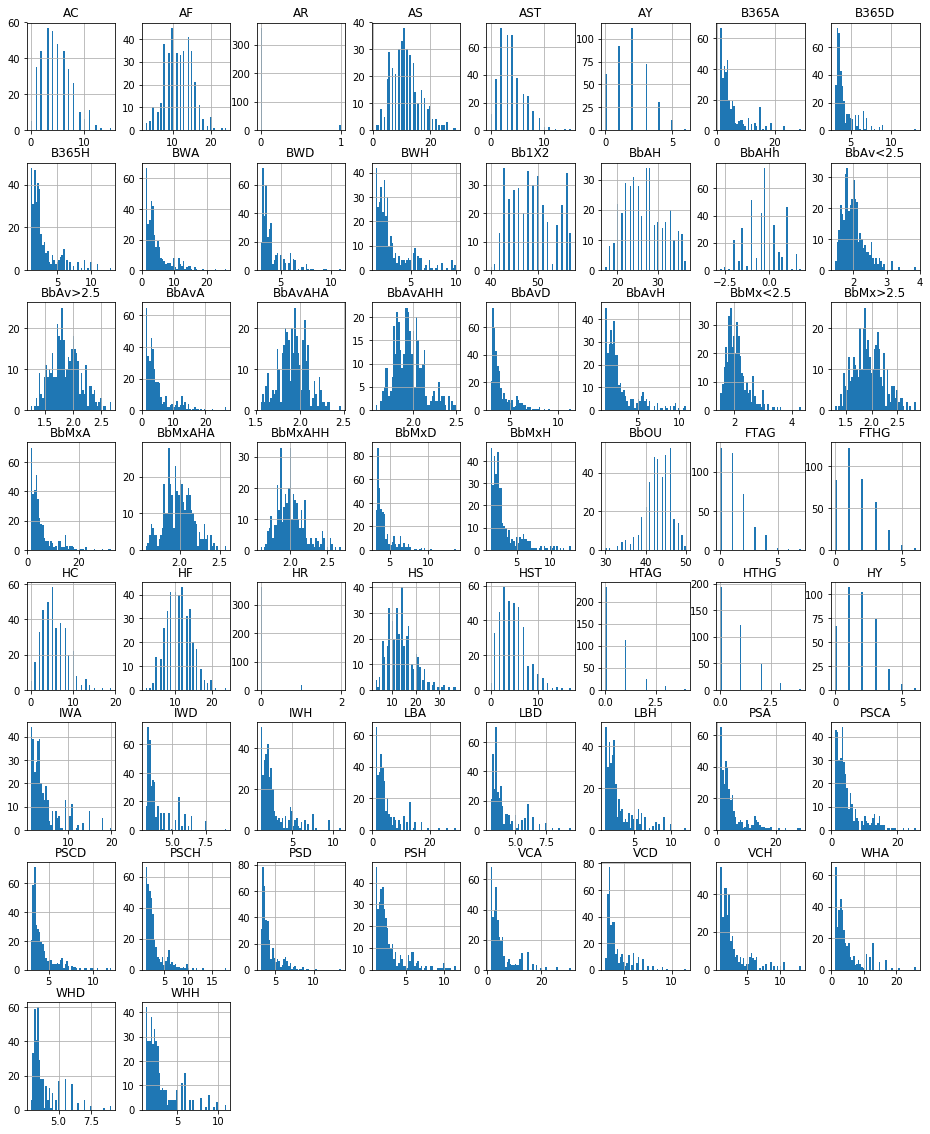

In [10]:
# Check for obvious patterns, such as similar distributiuons,
# sparse features and other relationship between features.

df_num = raw_df.select_dtypes(include=["float64", "int64"])
df_num.hist(figsize=(16, 20), bins=50);

Generally one would look at correlations in the data at this point. Since we don't have a specific goal with the assignment, we can't concude what relationships are interesting, and thus what features could be removed or if we should consider polynomial combinations of the features

# Filter for Arsenal

In [11]:
# Fitler dataframe for all matches were Arsenal plays.
afc_df = raw_df[(raw_df["HomeTeam"] == "Arsenal") |
                (raw_df["AwayTeam"] == "Arsenal")]
afc_df.index = pandas.to_datetime(afc_df.index, format="%d/%m/%y")

print(afc_df.shape)
afc_df.head()

(38, 63)


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-14,Arsenal,Liverpool,3,4,A,1,1,D,M Oliver,9,16,5,7,13,17,5,4,3,3,0,0,2.40,3.50,3.10,2.35,3.30,2.90,2.30,3.3,2.90,2.38,3.40,3.10,2.41,3.53,3.10,2.50,3.10,3.00,2.40,3.50,3.10,55,2.50,2.36,3.55,3.42,3.20,3.04,42,1.98,1.81,2.09,1.99,31,-0.50,2.41,2.31,1.81,1.64,2.80,3.44,2.68
2016-08-20,Leicester,Arsenal,0,0,D,0,0,D,M Clattenburg,8,13,1,4,11,7,2,7,1,2,0,0,2.88,3.60,2.50,2.75,3.60,2.45,2.75,3.3,2.40,2.90,3.60,2.40,2.92,3.60,2.50,2.88,3.20,2.50,2.90,3.60,2.50,56,3.00,2.87,3.63,3.48,2.55,2.45,42,1.74,1.69,2.24,2.16,32,0.25,1.83,1.78,2.15,2.10,2.82,3.50,2.63
2016-08-27,Watford,Arsenal,1,3,A,0,3,A,K Friend,14,10,6,7,18,15,3,2,6,1,0,0,5.00,3.75,1.73,5.00,3.75,1.72,4.50,3.5,1.75,5.00,3.75,1.75,5.47,3.91,1.72,4.60,3.75,1.73,5.25,3.90,1.73,55,5.50,5.12,3.91,3.72,1.78,1.72,43,2.00,1.91,1.97,1.87,33,1.00,1.72,1.67,2.34,2.24,6.00,4.16,1.63
2016-09-10,Arsenal,Southampton,2,1,H,1,1,D,R Madley,17,11,2,5,10,8,6,1,2,5,0,0,1.57,4.20,6.50,1.55,4.20,6.00,1.55,3.9,5.60,1.57,4.20,6.50,1.60,4.35,6.15,1.62,3.50,6.50,1.57,4.33,6.50,56,1.63,1.57,4.39,4.15,6.50,5.98,45,1.85,1.79,2.10,2.02,36,-1.00,2.00,1.95,1.96,1.90,1.63,4.17,6.05
2016-09-17,Hull,Arsenal,1,4,A,0,1,A,R East,6,24,2,9,9,12,2,4,0,2,1,0,6.00,4.20,1.60,6.00,4.00,1.57,5.50,4.0,1.60,6.00,4.20,1.57,6.03,4.20,1.60,6.00,3.60,1.62,6.50,4.10,1.60,57,6.50,5.94,4.27,4.05,1.64,1.59,46,1.96,1.87,2.00,1.92,36,1.00,1.89,1.85,2.07,2.00,6.12,4.19,1.62


# Ploting of Arsenal goals

In [12]:
# Helperfunction to determine if arsenal is home or away.
def arsenal_goals(row):
    if row['HomeTeam'] == 'Arsenal':
        return row['FTHG']
    if row['AwayTeam'] == 'Arsenal':
        return row['FTAG']
    else:
        return None

afc_goals = afc_df.apply(lambda row: arsenal_goals(row), axis=1)

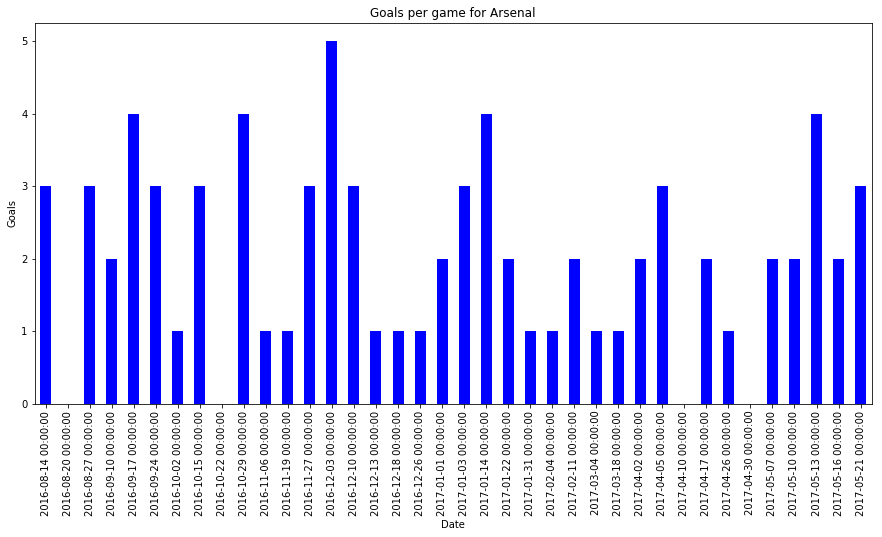

In [13]:
# Plot the goals per game 
fig, ax = plt.subplots(figsize=(15, 7))
afc_goals.plot(kind="bar", ax=ax, color="blue",
               title="Goals per game for Arsenal")
ax.set_ylabel("Goals");

In [14]:
# Group by month and sum goals from each match in each group.
month_goals = afc_goals.groupby(by=[afc_goals.index.month]).sum()

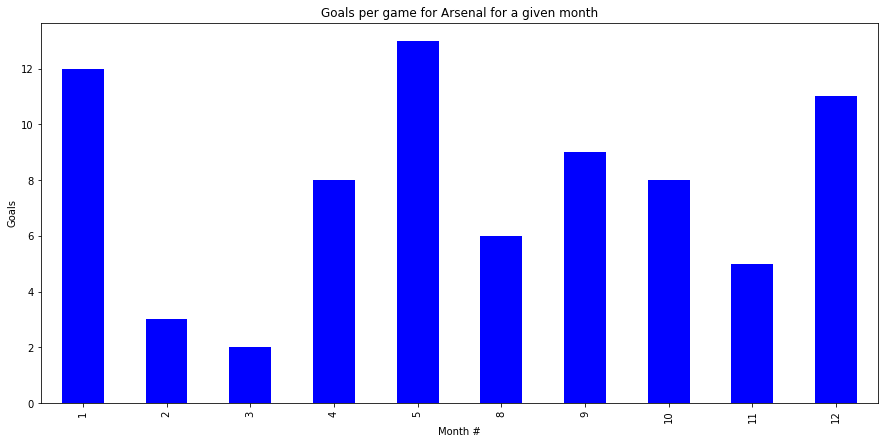

In [15]:
fig, ax = plt.subplots(figsize=(15, 7))
month_goals.plot(kind="bar", ax=ax, color="blue",
                 title="Goals per game for Arsenal for a given month")
ax.set_ylabel("Goals");
ax.set_xlabel("Month #");

In [16]:
# Get Arsenal goal away and at home
afc_home = raw_df[(raw_df["HomeTeam"] == "Arsenal")]["FTHG"]
afc_away = raw_df[(raw_df["AwayTeam"] == "Arsenal")]["FTAG"]

In [17]:
# Calculate the means.
mean_away = afc_away.mean()
mean_home = afc_home.mean()

print("Arsenal scored {} on average on away field".format(mean_away))
print("Arsenal scored {} on average on home field".format(mean_home))

Arsenal scored 2.0 on average on away field
Arsenal scored 2.0526315789473686 on average on home field


# Correlation between corner kicks

In [18]:
# Calcuate correlation between home corners and away corners.

# Pandas way for pearson
print("Pearson Coefficient: {}".format(df_num["AC"].corr(df_num["HC"], method="pearson")))
print()

# Spearman rank coefficient.
sig = 0.05
r_s = stat.spearmanr(df_num["AC"].values, df_num["HC"].values)
print('Spearman Rank Coefficient: ', r_s[0])

if r_s[1] < sig:
    print('There is significant evidence of a relationship.')
else:
    print('There is not significant evidence of a relationship.')

Pearson Coefficient: -0.2957242276759231

Spearman Rank Coefficient:  -0.30267167904563874
There is significant evidence of a relationship.


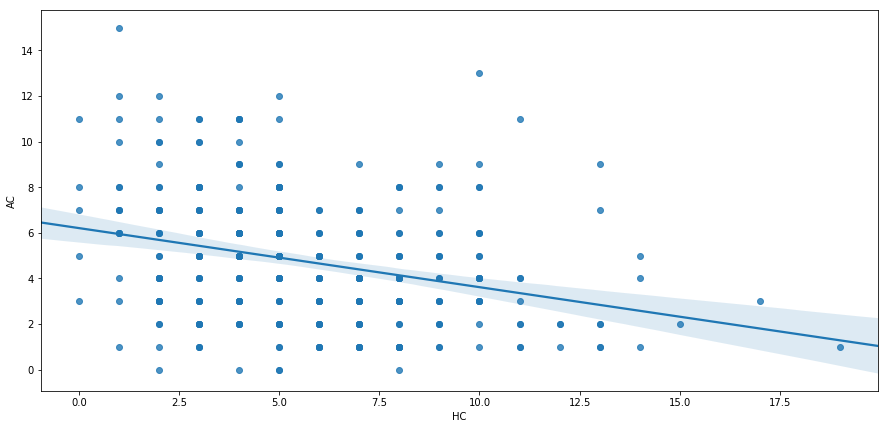

In [19]:
# Plot the correlation.
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="HC", y="AC", data=df_num[["AC", "HC"]], ax=ax);

# Model for predicting corner kicks

In [20]:
# Given our extremely sparse dataset we will pick a simple model, as we can 
# easily overfit a complicated model on such small datapoints.

# I will create a simple boosting gradient model that takes the numerical data from our dataframe as input.
# It will determine the importance of each feature, and retrain a model with only the most significant features.
# Other stuff such as correlational analysis of the features could have been done, and for instance, we might
# see that some features have a polynomial relationsship which you coud have taken advatage off before feeding data
# to the model. We will leave this for another time, and keep it simple here. Hyperparameter optimizationn isn't done
# but if one wanted to be more advanced they coud use bayesian hyperparameter optimization. Or somethink simpler 
# like a grid search.

def grad_boost(X, Y):

    seed = 9
    test_size = 0.10
    X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=test_size, random_state=seed)

    model = xb.XGBClassifier(max_depth = 3, seed = seed)
    model.fit(X_train, y_train)
    print(model)

    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]

    base_MAE = mean_absolute_error(y_test, predictions)
    print()
    print("Baseline MAE: %.3f" % (base_MAE))

    #Example of visualizing importance of features based on decision trees in the algo
    fig, ax = plt.subplots(figsize=(15, 10))
    plot_importance(model, ax=ax)


    #Sorting features in terms of importance.
    thresholds = numpy.sort(model.feature_importances_)

    for thresh in thresholds[10:]:
        # select features using threshold
        selection = SelectFromModel(model, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)
        # train model
        selection_model = xb.XGBClassifier(max_depth = 3, seed = seed)
        selection_model.fit(select_X_train, y_train)
        # eval model
        select_X_test = selection.transform(X_test)
        y_pred = selection_model.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        MAE = mean_absolute_error(y_test, predictions)
        # print if greater that the baseline model
        if MAE < base_MAE:
            print("Thresh=%.3f, n=%d, MAE: %.2f" % (thresh, select_X_train.shape[1],
            MAE))

In [21]:
# Get total cornerkicks in a game.
df_num['TC'] = df_num['AC'] + df_num['HC']

In [22]:
y = df_num['TC'].values
Xs = df_num.drop(["TC","AC", "HC"], axis=1)
X = Xs.values

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=9, silent=True,
       subsample=1)

Baseline MAE: 2.500
Thresh=0.005, n=47, MAE: 2.45
Thresh=0.007, n=43, MAE: 2.34
Thresh=0.007, n=43, MAE: 2.34
Thresh=0.007, n=40, MAE: 2.45
Thresh=0.008, n=39, MAE: 2.39
Thresh=0.008, n=39, MAE: 2.39
Thresh=0.013, n=27, MAE: 2.39
Thresh=0.018, n=23, MAE: 2.34


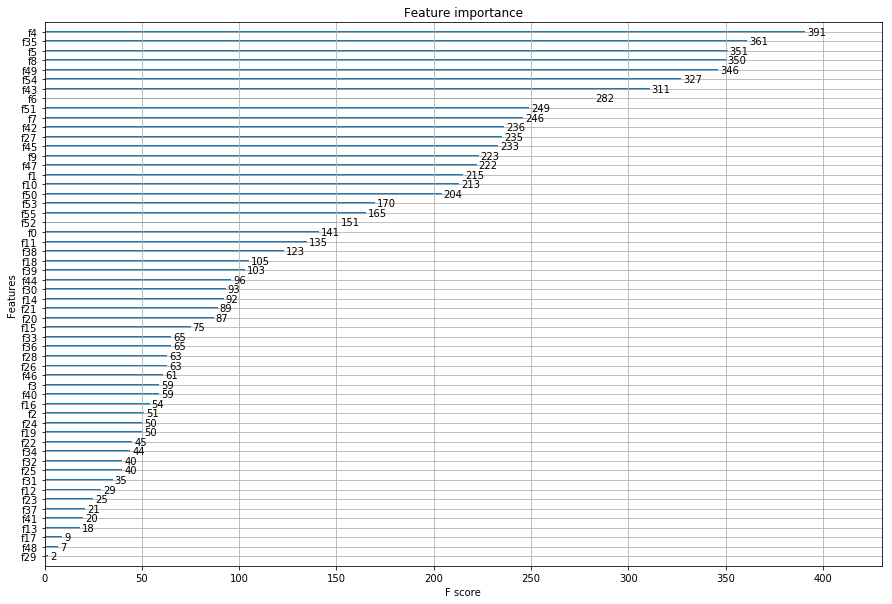

In [23]:
grad_boost(X,y)